In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sb

# Predicting male body fat percentage (BFP)

Motivation: accurate measurements of bodyfat percentage (BFP) are difficult to obtain. **Can we predict BFP using  easily measurable quantities?**

Aim: We'll try various Machine Learning models to build a predictive model of BFP based on a medium sized dataset of 14 measurements

    Percent body fat
    Age (years)
    Weight (lbs)
    Height (inches)
    Neck circumference (cm)
    Chest circumference (cm)
    Abdomen 2 circumference (cm)
    Hip circumference (cm)
    Thigh circumference (cm)
    Knee circumference (cm)
    Ankle circumference (cm)
    Biceps (extended) circumference (cm)
    Forearm circumference (cm)
    Wrist circumference (cm)




## Here is the raw data (this is ugly code, but it avoids drive mounting)

In [149]:
data_dict={}
data_dict['BodyFat'] = [15.6,28. ,24.4,12.4,14. ,16. ,14.2,29.8,22.4,11.8,16.5,14.9,28.7,22.1,26.7, 8.3,13.6,32. ,10.8,16.6, 7.8,24.8, 5.6,29. , 6.6,31.2,20.4,12.3,19.3,
 30. ,22.7,23.3,16.5,13.5,29.9,24.3,17.5,24.4,29.3,21.2,22.1,23.6,28. , 6. ,12.5,35. ,19.5,24.9, 6.3,13. ]
data_dict['Age'] = [31,62,41,25,28,28,24,56,40,61,27,56,24,47,58,46,51,41,47,44,27,62,39,67,42,28,41,23,43,55,40,52,33,55,65,62,46,41,72,30,43,43,43,44,55,65,49,40,49,
 33]
data_dict['Weight'] = [140.25,201.25,185.  ,176.  ,151.25,183.75,156.  ,178.75,168.25,143.  ,156.75,174.5 ,184.25,178.25,161.75,176.75,149.25,212.  ,159.75,208.75,216.  ,
 191.5 ,148.5 ,199.5 ,167.25,205.75,210.5 ,154.25,200.25,183.5 ,171.25,167.  ,211.75,125.  ,189.75,167.5 ,167.  ,168.25,186.75,205.25,150.  ,170.75,
 183.25,184.  ,126.5 ,224.5 ,168.25,176.75,152.75,184.25]
data_dict['Height'] = [68.25,69.5 ,68.25,72.5 ,67.75,67.75,70.75,68.5 ,71.25,65.75,67.25,69.5 ,71.25,70.  ,67.25,72.5 ,69.75,71.5 ,70.75,73.  ,76.  ,72.25,71.25,68.5 ,
 72.75,69.  ,72.  ,67.75,73.5 ,67.5 ,70.5 ,67.75,73.5 ,64.  ,65.75,71.5 ,67.  ,69.5 ,66.  ,71.25,69.25,67.5 ,70.  ,74.  ,66.75,68.25,71.75,71.  ,
 73.5 ,68.75]
data_dict['Neck'] = [33.9,40.5,38. ,37.8,34.5,38. ,35.7,35.6,34.3,36.5,37.9,38.1,34.4,40.2,35.1,38. ,34.8,41.5,34.5,41.9,39.4,40.6,34.6,40.7,37.6,38.5,38.5,36.2,38.6,
 40.9,36.3,37.5,40. ,33.2,40.8,35.5,36.6,36.5,38.9,39.4,35.2,37.4,37.1,37.9,33.4,38.8,38.3,37.4,35.1,40.7]
data_dict['Chest'] = [ 86. ,111.5,103.4, 99.6, 90.2,106.8, 92.7,102.9, 98.3, 93.4, 94. ,104. , 97.3, 99.7, 94.9, 97.3, 92.8,106.6, 92.9,105.6,103.6,104. , 89.8,118.3,
  94. ,105.6,107.4, 93.1,105.2,103. , 94.6,102.7,106.2, 87.7,106.4, 97.6,101. , 98.4,111.1,104.1, 91.1,103.7,108. ,100.8, 88.8,119.6, 98.3, 98.6,
  93.3, 98.9]
data_dict['Abdomen'] = [ 76.4,104.2,101.2, 88.5, 76.3, 89.6, 81.9, 94.7, 88.5, 83.3, 88.2, 89.4,100. , 95. , 94.9, 86. , 81.1,104.3, 84.4, 96.3, 90.9, 98.2, 79.5,106.1,
  78. ,105. , 98.9, 85.2,102.8,100.3, 90.3, 91. ,100.5, 76. ,100.5, 91.5, 89.9, 87.2,111.5,101.8, 85.7, 89.7,105. , 89.1, 78.2,118. , 89.7, 93.1,
  79.6, 92.1]
data_dict['Hip'] = [ 94.6,105.8,103.1, 97.1, 95.8,102.4, 95.3,100.8, 98.3, 93. , 95.2, 98.4,101.9, 98.6,100.2, 99.3, 96.3,106. , 94. ,102. ,107.7,101.1, 92.7,101.6,
  99. ,106.4,104.1, 94.5,103.6,104.2, 99.1, 98.9,109. , 88.6,100.5, 98.5,100. , 98.4,101.7,108.6, 96.9, 94.2,103. ,102.6, 87.5,114.3, 99.1,101.6,
  91.6,103.5]
data_dict['Thigh'] = [57.4,61.8,61.5,60. ,58.4,64.2,56.4,60.9,58.1,55.5,56.8,58.4,63.2,62.3,56.8,61. ,53.8,65. ,56. ,63.3,66.2,59.3,52.7,58.2,57.5,68.6,63.5,59. ,61.2,
 64.8,60.3,57.1,65.8,50.9,59.2,56.6,60.7,56. ,60.3,66. ,55.5,58.5,63.7,60.6,50.8,61.3,56.3,59.1,52.6,64. ]
data_dict['Knee'] = [35.3,39.8,40.4,39.4,35.5,38.7,36.5,38. ,38.4,35.2,37.4,37.4,42.2,38.1,35.9,38.4,36.5,40.2,38.2,39.8,39.2,40.3,37.5,38.8,40. ,40. ,39.8,37.3,39.3,
 40.2,38.5,36.7,40.6,35.4,38.1,38.6,36. ,36.9,37.3,41.5,35.7,39. ,40. ,39. ,33. ,42.1,38.8,39.6,37.6,37.3]
data_dict['Ankle'] = [22.2,22.7,22.9,23.2,22.9,22.9,22. ,22.1,22.5,20.9,22.8,22.5,24. ,23.9,21. ,23.8,21.5,23. ,22.6,24.1,25.9,23. ,21.9,24.1,22.5,25.2,23.5,21.9,23.5,
 22.7,23. ,22.3,24. ,19.1,24. ,22.4,21.9,23. ,21.5,23.7,22. ,24.1,23.6,24. ,19.7,23.4,23. ,21.6,22.6,23.5]
data_dict['Biceps'] = [27.9,37.7,33.4,30.5,31.1,37.2,33.5,32.5,31.7,29.4,30.6,34.6,32.2,35.3,27.8,30.2,31.3,35.8,29. ,37.3,37.2,32.6,28.8,32.1,30.6,35.2,36.4,32. ,30.5,
 34.8,31.2,31.6,37.1,29.3,35.9,31.5,35.6,34. ,31.3,36.9,29.4,33.8,33.5,32.9,25.3,34.9,29.5,30.8,38.5,33.5]
data_dict['Forearm'] = [25.9,30.9,29.2,29. ,28. ,30.5,28.3,29.8,27.4,27. ,28.3,30.1,27.7,31.1,26.1,29.3,26.3,31.5,26.2,23.1,30.2,28.5,26.8,29.3,30. ,30.7,30.4,27.4,28.5,
 30.1,28.4,27.5,30.1,25.7,30.5,27.3,30.2,29.8,27.2,31.6,26.6,28.8,27.8,29.2,22. ,30.1,27.9,27.9,27.4,30.6]
data_dict['Wrist'] = [16.7,19.2,18.5,18.8,17.6,18.5,17.3,18.3,17.6,16.8,17.9,18.8,17.7,19.8,17.6,18.8,17.8,18.8,17.6,19.4,19. ,19. ,17.9,18.5,18.5,19.1,19.1,17.1,18.1,
 18.7,17.1,17.9,18.2,16.9,19.1,18.6,17.6,18.1,18. ,18.8,17.4,18.8,17.4,18.4,15.8,19.4,18.6,16.6,18.5,19.7]
data_dict['BMI'] = [21.17,29.29,27.92,23.54,23.17,28.15,21.91,26.78,23.3 ,23.26,24.37,25.4 ,25.52,25.58,25.15,23.64,21.57,29.16,22.44,27.54,26.29,25.79,20.57,29.89,
 22.22,30.38,28.55,23.63,26.06,28.32,24.22,25.58,27.56,21.46,30.86,23.04,26.16,24.49,30.14,28.43,21.99,26.35,26.29,23.62,19.96,33.89,22.98,24.65,
 19.88,27.41]


## Convert the data dictionary to a data frame

In [150]:
#Useful list of predictors
all_predictors = [ 'Abdomen', 'BMI', 'Chest', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
df = pd.DataFrame()
for c in data_dict:
  df[c]=data_dict[c]
print(df.shape)
df.head()


(50, 15)


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,15.6,31,140.25,68.25,33.9,86.0,76.4,94.6,57.4,35.3,22.2,27.9,25.9,16.7,21.17
1,28.0,62,201.25,69.50,40.5,111.5,104.2,105.8,61.8,39.8,22.7,37.7,30.9,19.2,29.29
2,24.4,41,185.00,68.25,38.0,103.4,101.2,103.1,61.5,40.4,22.9,33.4,29.2,18.5,27.92
3,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8,23.54
4,14.0,28,151.25,67.75,34.5,90.2,76.3,95.8,58.4,35.5,22.9,31.1,28.0,17.6,23.17


# Data exploration

When building a model, make it a priority to explore the data first!

A useful measure of the strength of a linear relationship between two variables is the correlation coefficient.

$$
\rho(X,Y) = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n (x_i-\bar{x})^2} \sqrt{\sum_{j=1}^n (y_i-\bar{y})^2}}
$$

The plot below shows the correlations between each of our observations.


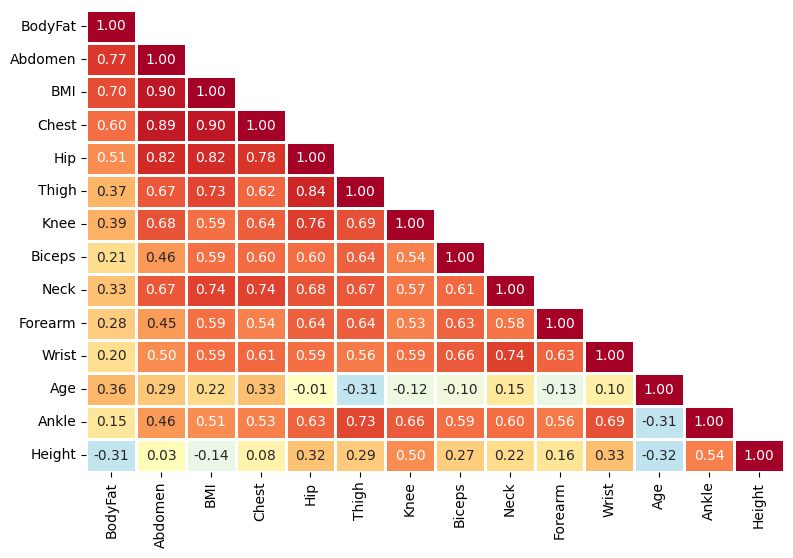

In [151]:
my_cols = ['BodyFat', 'Abdomen', 'BMI', 'Chest', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
#sb.heatmap(df[my_cols].corr(),cmap='Spectral_r',vmin=-1,vmax=1)
fig,ax = plt.subplots(figsize=(9,6))
corr = df[my_cols].corr()
matrix =1- np.triu(np.ones(corr.shape)).T
sb.heatmap(corr,mask=matrix,cmap='RdYlBu_r',vmin=-1,vmax=1,annot=True,fmt='.2f',cbar=False,ax=ax,linewidths=1)
#plt.tight_layout()
plt.show()

## Exercise

Let $Y$ be body fat percentage (BFP)---**the response variable**---and $X_1, X_2, \ldots, X_{13}$ be our **predictors**.

Suppose you fitted a linear model of the form

$$
Y = \beta_0 + \beta_i X_i + \beta_j X_j + \mathcal{E}
$$

where $\mathcal{E} \sim \mathcal{N}(0,\sigma^2)$, which two predictors do you think would make the best predictions and why?

Do you think that using more predictors will *always* give a you a more accurate model?


## Building univariate models

The function below will train and test a *univariate* linear model of the form

$$
Y = \beta_0 + \beta_i X_i  + \mathcal{E}
$$

It will plot a graph of the resulting prediction function
$$
\hat{y}_j = \hat{\beta}_0 + \hat{\beta}_i x_{ij}
$$
which is annotated with the cross-validated root mean squared prediction error
$$
\mathrm{RMSE} \approx \sqrt{\mathbb{E}((Y- \hat{Y})^2)}
$$


In [152]:
def build_univariate_model(df,predictor):
    X_train = df[[predictor]].values
    xmin = min(X_train)
    xmax = max(X_train)
    y_train = df.BodyFat.values
    res={}
    model = LinearRegression()
    model.fit(X_train,y_train)
    res['beta0']=model.intercept_
    for i,beta in enumerate(model.coef_):
        res[f'beta{i+1}']=beta
    scores = cross_validate(model, X_train, y_train, cv=20,
                             scoring=['neg_mean_squared_error','r2'],
                             return_train_score=True)
    res['CV_RMSE']=np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    res['R2']=np.mean(scores['train_r2'])

    plt.scatter(X_train,y_train,color='coral')
    xs = np.linspace(xmin,xmax,100)
    ys = model.predict(xs)
    plt.plot(xs,ys)
    plt.legend(['data','linear model'])
    plt.ylim(0,35)
    plt.title(f'Boady fat prediction using {predictor}')
    err = res['CV_RMSE']
    plt.annotate(f'RSME={err:.2f}',xy=(xmin+0.7*(xmax-xmin),5))
    plt.xlabel(predictor)
    plt.ylabel('BFP')
    plt.show()
    return res


### Here is an example of model which uses BMI to predict BFP

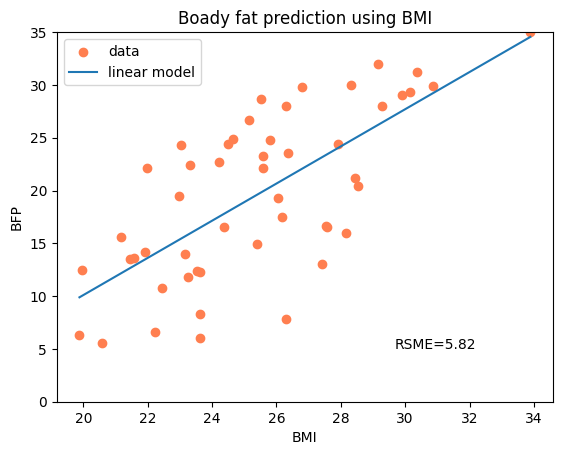

{'beta0': -25.101770060934896, 'beta1': 1.7600262327862064, 'CV_RMSE': 5.8207372769090435, 'R2': 0.4852606556925239}


In [153]:
results = build_univariate_model(df,'BMI')
print(results)

## Exercise

Which are the best two and worst two predictors upon which to base a univariate prediction model (in terms of RMSE score)? How does your result relate to the correlations between predictor and response variables?

In [167]:
#Put your solution code here

## Building multivariate models

The function below will train and test a *multi-variate* linear model of the form

$$
Y = \beta_0 + \sum_{i \in P} \beta_i X_i  + \mathcal{E}
$$

where $P$ is a subset of the available predictors. The function will return a dictionary of coefficient estimates, the cross validated RMSE, and the coefficient of determination ($R^2$). It will also plot a graph of true vs predicted BFP on the *training data*. As a baseline comparison the true vs predcited BFP using only abdomen measurements will also be shown.


In [154]:
def build_multivariate_model(df,predictors):
    dp=3
    X_train = df[predictors].values
    y_train = df.BodyFat.values
    res={}
    model = LinearRegression()
    model.fit(X_train,y_train)
    yp = model.predict(X_train)

    res['beta0']=np.round(model.intercept_,dp)
    for i,beta in enumerate(model.coef_):
        res[f'beta{i+1} ({predictors[i]})']=np.round(beta,dp)

    scores = cross_validate(model, X_train, y_train, cv=20,
                             scoring=['neg_mean_squared_error','r2'],
                             return_train_score=True)
    res['CV_RMSE']=np.round(np.sqrt(-np.mean(scores['test_neg_mean_squared_error'])),dp)
    res['R2']=np.round(np.mean(scores['train_r2']),dp)

    err = res['CV_RMSE']

    #Train univariate abdomen model as baseline
    model_base = LinearRegression()
    X_train_base = df[['Abdomen']].values
    model_base.fit(X_train_base,y_train)
    yp_base = model_base.predict(X_train_base)

    scores_base = cross_validate(model_base, X_train_base, y_train, cv=20,
                             scoring=['neg_mean_squared_error','r2'],
                             return_train_score=True)
    RMSE_base = np.round(np.sqrt(-np.mean(scores_base['test_neg_mean_squared_error'])),dp)

    plt.scatter(y_train,yp,alpha=0.5)
    plt.scatter(y_train,yp_base,alpha=0.5)
    plt.title(f'Multivariate RMSE = {err} vs. Abdomen RMSE = {RMSE_base}')
    ys = np.linspace(0,35,100)
    plt.xlabel('True BFP')
    plt.ylabel('Predicted BFP')
    plt.plot(ys,ys,color='seagreen',linewidth=2)
    plt.legend(['Multivariate','Abdomen','Perfect'])
    plt.show()

    return res

## Examples

Let's try:

*   Chest and BMI
*   All the predictors



results using ['BMI', 'Chest']


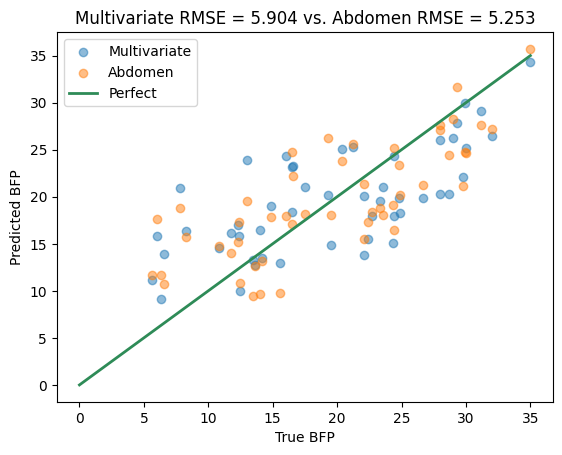

results using ['Abdomen', 'BMI', 'Chest', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']


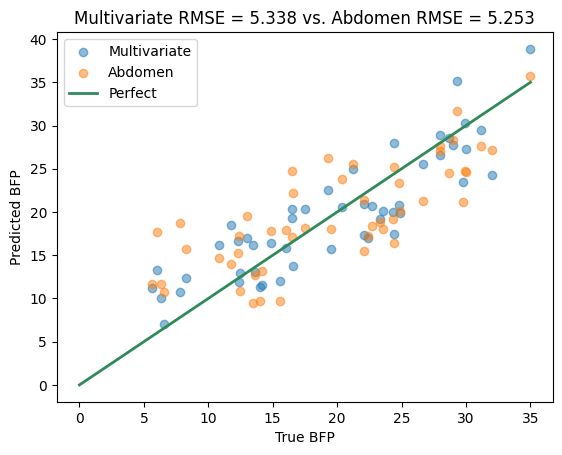

In [165]:
predictors =  ['BMI', 'Chest']
print(f'results using {predictors}')
res1 = build_multivariate_model(df,predictors)

print(f'results using {all_predictors}')
res2 = build_multivariate_model(df,all_predictors)



## Exercise

The above results might be surprising: using only abdomen is better than using all the predictors combined! This is due to overfitting. Although the multivariate predictions are better when applied to the traning data, they are worse on unseen data.

Can you find a combination of predictors which beats Abdomen alone?

In [168]:
#Put your solution code here

## Lasso regularised model

The idea of lasso regularisation is to add an extra penality term to the loss function which penalises the sum of the magnitudes of the model coefficients. For a model with $p$ predictors we have

$$
\textrm{loss}(\beta_0,\beta_1, \ldots, \beta_p) = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \alpha \sum_{j=1}^p |\beta_j|
$$

We esimate the coefficients by minimising the loss. The penality term *constrains* the coefficient values, making many of them zero. This yeilds a sparse model.





In [156]:
def lasso_scores(predictors,alphas):
  predictors = np.array(predictors)

  X_train = df[predictors].values
  y_train = df.BodyFat.values

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)

  cv_rmses = []
  coeffs=[]

  for alpha in alphas:
      reg=Lasso(alpha=alpha)
      scores = cross_val_score(reg, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
      cv_rmses.append(np.sqrt(-np.mean(scores)))
      reg.fit(X_train,y_train)
      coeffs.append(reg.coef_)

  i = np.argmin(cv_rmses)
  alpha = alphas[i]
  rmse = cv_rmses[i]

  plt.scatter([alpha],[rmse],color='r',s=100)
  plt.annotate(f'Optimal error = {rmse:.3f}',xy=(alpha,rmse),xytext=(alpha,rmse+0.2),arrowprops=dict(facecolor='black', shrink=0.05))


  reg = Lasso(alpha=alpha)
  reg.fit(X_train,y_train)
  used = np.abs(reg.coef_)>1e-5

  print(f'predictors used = {predictors[used]}')
  coefs_used = reg.coef_[used]
  print(f'coefficients = {coefs_used}')


  plt.plot(alphas,cv_rmses)
  plt.xlabel(r'$\alpha$')
  plt.ylabel(r'$RMSE(\alpha)$')
  plt.show()


predictors used = ['Abdomen' 'Neck' 'Age' 'Height']
coefficients = [ 6.33254901 -0.89588926  0.04916601 -2.12048393]


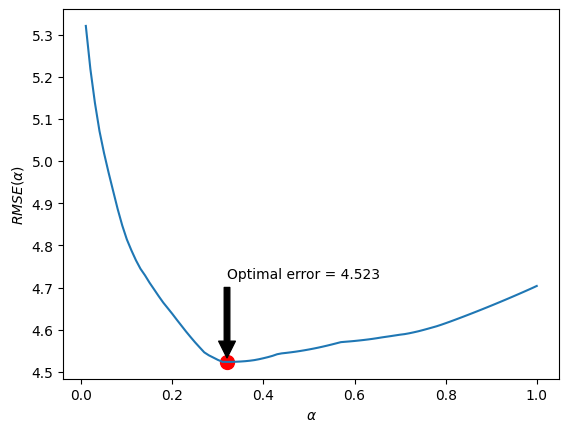

In [157]:
alphas = np.linspace(0.01,1,100)
lasso_scores(all_predictors,alphas)

results using ['Abdomen', 'Neck', 'Age', 'Height']


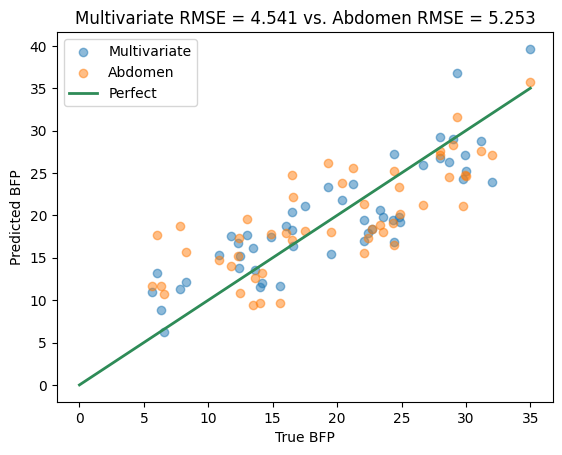

In [158]:
lasso_predictors = ['Abdomen', 'Neck', 'Age', 'Height']
print(f'results using {lasso_predictors}')
res2 = build_multivariate_model(df,lasso_predictors)